# Задание к лабораторной работе №8 по машинному обучению

линейная регрессия, полиномиаьная регрессия, регуляризация, логистическая регрессия

Датасет для задачи регрессии - load_diabetes

Датасет для задачи классификации - load_breast_cancer

1. Регрессия. Применить линейную (и модели с регуляризацией) и полиномиальную регрессию к датасету load_diabetes. Вывести метрики R2, MSE, MAE для двух моделей. Построить scatterplot predicted vs. true.
2. Классификация. Найти оптимальное значение параметра регуляризации $C$ с помощью LogisticRegressionCV – перебора параметров по сетке с последующей кросс-валидацией. Этот класс создан специально для логистической регрессии (для нее известны эффективные алгоритмы перебора параметров), для произвольной модели мы бы использовали GridSearchCV, RandomizedSearchCV. Построить график зависимости метрики ROC-AUC от параметра С.
3. Выбрать порог классификации для LogisticRegression на основе метрики  

In [11]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             fbeta_score, roc_curve, roc_auc_score, precision_recall_curve,
                             auc, average_precision_score, classification_report)
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score, r2_score
from sklearn.datasets import load_iris, load_diabetes
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score, roc_auc_score
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

data1 = datasets.load_diabetes()
data2 = datasets.load_breast_cancer()

X_train1, X_test1, y_train1, y_test1 = train_test_split(data1['data'], data1['target'], test_size=0.33, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(data2['data'], data2['target'], test_size=0.33, random_state=42)

R2 score (Linear regression): 0.510394257282125
R2 score (Polynomial regression): -46.599198706652835
ElasticNet R2 score: 0.009013296318543307
Lasso R2 score: 0.36246898582743314
Ridge R2 score: 0.4445111375735453 

MSE (Linear regression): 2817.8082972215852
MSE (Polynomial regression): 273945.759525113
ElasticNet MSE: 5703.386035810746
Lasso MSE: 3669.156680024302
Ridge MSE: 3196.982774079495 

MAE (Linear regression): 41.96450967184069
MAE (Polynomial regression): 308.91406327303014
ElasticNet MAE: 65.86529481900901
Lasso MAE: 51.05956121475607
Ridge MAE: 46.456352070667506 

MAPE (Linear regression): 0.3551085988467079
MAPE (Polynomial regression): 2.6415830478908457
ElasticNet MAPE: 0.5991043575873881
Lasso MAPE: 0.4539874796896753
Ridge MAPE: 0.408869519390425 



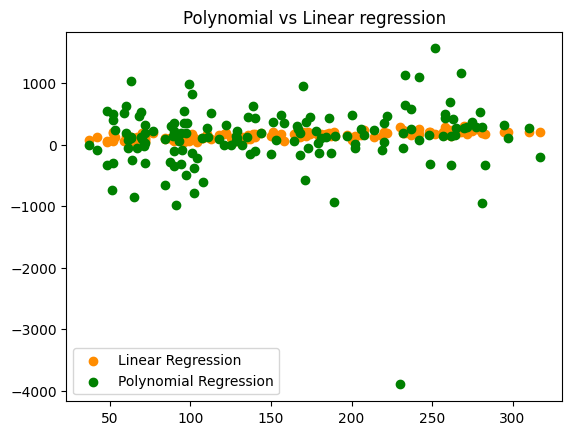

In [39]:
# Регрессия

poly_features = PolynomialFeatures(degree=8, include_bias=True)
X1_poly = poly_features.fit_transform(data1['data'])
X1_poly_train, X1_poly_test = train_test_split(X1_poly, test_size=0.33, random_state=42)

sk_linear_regression = LinearRegression()
sk_linear_regression.fit(X_train1, y_train1)
sk_lr_pred_res = sk_linear_regression.predict(X_test1)
sk_lr_pred_all_data_res = sk_linear_regression.predict(data1['data'])

sk_polynomial_regression = LinearRegression()
sk_polynomial_regression.fit(X1_poly_train, y_train1)
sk_poly_lr_pred_res = sk_polynomial_regression.predict(X1_poly_test)
sk_poly_lr_pred_all_data_res = sk_polynomial_regression.predict(X1_poly)

linear_regression_r2 = r2_score(y_test1, sk_lr_pred_res)
polynomial_regression_r2 = r2_score(y_test1, sk_poly_lr_pred_res)

linear_regression_mse = mean_squared_error(y_test1, sk_lr_pred_res)
polynomial_regression_mse = mean_squared_error(y_test1, sk_poly_lr_pred_res)

linear_regression_mae = mean_absolute_error(y_test1, sk_lr_pred_res)
polynomial_regression_mae = mean_absolute_error(y_test1, sk_poly_lr_pred_res)

linear_regression_mape = mean_absolute_percentage_error(y_test1, sk_lr_pred_res)
polynomial_regression_mape = mean_absolute_percentage_error(y_test1, sk_poly_lr_pred_res)

# ElasticNet
sk_elastic_net_regression = ElasticNet()
sk_elastic_net_regression.fit(X_train1, y_train1)

sk_elastic_net_pred_res = sk_elastic_net_regression.predict(X_test1)
sk_elastic_net_pred_train_res = sk_elastic_net_regression.predict(X_train1)

sk_elastic_net_r2 = r2_score(y_test1, sk_elastic_net_pred_res)
sk_elastic_net_train_r2 = r2_score(y_train1, sk_elastic_net_pred_train_res)

sk_elastic_net_mse = mean_squared_error(y_test1, sk_elastic_net_pred_res)
sk_elastic_net_train_mse = mean_squared_error(y_train1, sk_elastic_net_pred_train_res)

sk_elastic_net_mape = mean_absolute_percentage_error(y_test1, sk_elastic_net_pred_res)
sk_elastic_net_train_mape = mean_absolute_percentage_error(y_train1, sk_elastic_net_pred_train_res)

sk_elastic_net_mae = mean_absolute_error(y_test1, sk_elastic_net_pred_res)
sk_elastic_net_train_mae = mean_absolute_error(y_train1, sk_elastic_net_pred_train_res)

# Lasso
sk_lasso_regression = Lasso()
sk_lasso_regression.fit(X_train1, y_train1)

sk_lasso_pred_res = sk_lasso_regression.predict(X_test1)
sk_lasso_pred_train_res = sk_lasso_regression.predict(X_train1)

sk_lasso_r2 = r2_score(y_test1, sk_lasso_pred_res)
sk_lasso_train_r2 = r2_score(y_train1, sk_lasso_pred_train_res)

sk_lasso_mse = mean_squared_error(y_test1, sk_lasso_pred_res)
sk_lasso_train_mse = mean_squared_error(y_train1, sk_lasso_pred_train_res)

sk_lasso_mape = mean_absolute_percentage_error(y_test1, sk_lasso_pred_res)
sk_lasso_train_mape = mean_absolute_percentage_error(y_train1, sk_lasso_pred_train_res)

sk_lasso_mae = mean_absolute_error(y_test1, sk_lasso_pred_res)
sk_lasso_train_mae = mean_absolute_error(y_train1, sk_lasso_pred_train_res)

# Ridge
sk_ridge_regression = Ridge()
sk_ridge_regression.fit(X_train1, y_train1)

sk_ridge_pred_res = sk_ridge_regression.predict(X_test1)
sk_ridge_pred_train_res = sk_ridge_regression.predict(X_train1)

sk_ridge_r2 = r2_score(y_test1, sk_ridge_pred_res)
sk_ridge_train_r2 = r2_score(y_train1, sk_ridge_pred_train_res)

sk_ridge_mse = mean_squared_error(y_test1, sk_ridge_pred_res)
sk_ridge_train_mse = mean_squared_error(y_train1, sk_ridge_pred_train_res)

sk_ridge_mape = mean_absolute_percentage_error(y_test1, sk_ridge_pred_res)
sk_ridge_train_mape = mean_absolute_percentage_error(y_train1, sk_ridge_pred_train_res)

sk_ridge_mae = mean_absolute_error(y_test1, sk_ridge_pred_res)
sk_ridge_train_mae = mean_absolute_error(y_train1, sk_ridge_pred_train_res)

print(f'R2 score (Linear regression): {linear_regression_r2}')
print(f'R2 score (Polynomial regression): {polynomial_regression_r2}')
print(f'ElasticNet R2 score: {sk_elastic_net_r2}')
print(f'Lasso R2 score: {sk_lasso_r2}')
print(f'Ridge R2 score: {sk_ridge_r2}', '\n')

print(f'MSE (Linear regression): {linear_regression_mse}')
print(f'MSE (Polynomial regression): {polynomial_regression_mse}')
print(f'ElasticNet MSE: {sk_elastic_net_mse}')
print(f'Lasso MSE: {sk_lasso_mse}')
print(f'Ridge MSE: {sk_ridge_mse}', '\n')

print(f'MAE (Linear regression): {linear_regression_mae}')
print(f'MAE (Polynomial regression): {polynomial_regression_mae}')
print(f'ElasticNet MAE: {sk_elastic_net_mae}')
print(f'Lasso MAE: {sk_lasso_mae}')
print(f'Ridge MAE: {sk_ridge_mae}','\n')

print(f'MAPE (Linear regression): {linear_regression_mape}')
print(f'MAPE (Polynomial regression): {polynomial_regression_mape}')
print(f'ElasticNet MAPE: {sk_elastic_net_mape}')
print(f'Lasso MAPE: {sk_lasso_mape}')
print(f'Ridge MAPE: {sk_ridge_mape}', '\n')

plt.scatter(y_test1, sk_lr_pred_res, color='darkorange', label='Linear Regression')
plt.scatter(y_test1, sk_poly_lr_pred_res, color='green', label='Polynomial Regression')
plt.title('Polynomial vs Linear regression')
plt.legend()
plt.show()

**Вывод:** в рамках данного задания были применены линейная (и модели с регуляризацией) и полиномиальная регрессии к датасету load_diabetes. При вычислении метрик для полиномиальной регрессии значения получились значительно отличающимися от моделей линейной регрессии. Вероятно, это связано с наличием выброса в модели полиномиальной регрессии. В данном примере ElasticNet имеет самую высокую точность среди всех видов регуляризации.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Оптимальное значение параметра C:  [166.81005372]
Точность при вычисленном C:  {1: array([[0.8961039 , 0.90909091, 0.92207792, 0.92207792, 0.90909091,
        0.94805195, 0.94805195, 0.97402597, 0.96103896, 0.97402597],
       [0.90789474, 0.92105263, 0.92105263, 0.92105263, 0.93421053,
        0.94736842, 0.97368421, 0.97368421, 0.97368421, 0.97368421],
       [0.92105263, 0.94736842, 0.97368421, 0.97368421, 0.97368421,
        0.96052632, 0.98684211, 0.97368421, 0.97368421, 0.97368421],
       [0.89473684, 0.92105263, 0.92105263, 0.92105263, 0.94736842,
        0.96052632, 0.97368421, 0.97368421, 0.97368421, 0.97368421],
       [0.90789474, 0.92105263, 0.90789474, 0.90789474, 0.89473684,
        0.89473684, 0.92105263, 0.92105263, 0.92105263, 0.92105263]])}
[1e-08, 1e-06, 0.0001, 0.001, 0.01, 0.1, 1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 231, 241, 251, 261, 271, 281, 291, 301, 311, 321, 331, 341, 351, 361, 371, 381, 391, 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

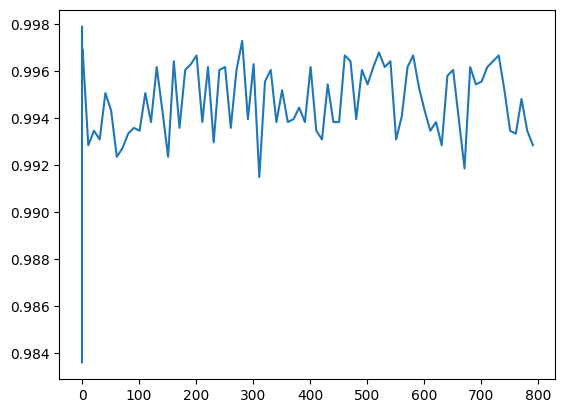

In [49]:
# Классификация
clf0 = LogisticRegressionCV(cv = 5, Cs = 10).fit(X_train2, y_train2)
print('Оптимальное значение параметра C: ', clf0.C_)
print('Точность при вычисленном C: ', clf0.scores_)

ROCAUC = []
c_values_0 = [0.00000001, 0.000001, 0.0001, 0.001, 0.01, 0.1]
c_values_1 = list(range(1,800,10))
c_values = c_values_0 + c_values_1
print(c_values)
for ci in c_values:
  clf = LogisticRegression(C=ci, random_state=42).fit(X_train2, y_train2)
  ROCAUC.append(roc_auc_score(y_test2, clf.decision_function(X_test2), average=None))

plt.plot(c_values, ROCAUC)

**Вывод:** в рамках данного задания была произведена классификация, найдено оптимальное значение параметра регуляризации C с помощью LogisticRegressionCV, а также построен график зависимости метрики ROC-AUC от параметра С. Можно сделать вывод, что кросс-валидация вносит вклад в результат вычисления точности.

In [35]:
# Выбор оптимального порога классификации на основе F1-score
thresholds = np.linspace(0, 1, 100)
f1_scores = [f1_score(y_test2, clf.predict_proba(X_test2)[:, 1] >= t) for t in thresholds]
optimal_threshold = thresholds[np.argmax(f1_scores)]
optimal_f1 = np.max(f1_scores)

print(f'Оптимальный порог классификации: {optimal_threshold:.4f}')
print(f'Максимальный F1-score: {optimal_f1:.4f}')

Оптимальный порог классификации: 0.3434
Максимальный F1-score: 0.9714


**Вывод:** в данном задании был вычислен оптимальный порог классификации равный 0.3434 для LogisticRegression на основе метрики F1 score, при котором точность классификации достигает 97%. Для повышения эффективности выбора порога целесообразно вычислять и сравнивать пороги, полученные через другие метрики.

###Черновик

In [ ]:
data1

In [ ]:
sk_linear_regression = LinearRegression()
sk_linear_regression.fit(X_train1, y_train1)

sk_lr_pred_res = sk_linear_regression.predict(X_test1)
sk_lr_r2 = r2_score(y_test1, sk_lr_pred_res)
sk_lr_mape = mean_absolute_percentage_error(y_test1, sk_lr_pred_res)

print(f'Scikit-learn Linear regression R2 score: {sk_lr_r2}')
print(f'Scikit-learn Linear regression MAPE: {sk_lr_mape}', '\n')

print(f'weights: {sk_linear_regression.intercept_, *sk_linear_regression.coef_}')
print(f'prediction: {sk_lr_pred_res}', '\n')

#sk_linear_regression.fit(X_train_s, y1_train)
#print(f'scaled weights: {sk_linear_regression.intercept_, *sk_linear_regression.coef_}')

In [36]:
sk_elastic_net_regression = ElasticNet()
sk_elastic_net_regression.fit(X_train1, y_train1)

sk_elastic_net_pred_res = sk_elastic_net_regression.predict(X_test1)
sk_elastic_net_pred_train_res = sk_elastic_net_regression.predict(X_train1)

sk_elastic_net_r2 = r2_score(y_test1, sk_elastic_net_pred_res)
sk_elastic_net_train_r2 = r2_score(y_train1, sk_elastic_net_pred_train_res)

sk_elastic_net_mse = mean_squared_error(y_test1, sk_elastic_net_pred_res)
sk_elastic_net_train_mse = mean_squared_error(y_train1, sk_elastic_net_pred_train_res)

sk_elastic_net_mape = mean_absolute_percentage_error(y_test1, sk_elastic_net_pred_res)
sk_elastic_net_train_mape = mean_absolute_percentage_error(y_train1, sk_elastic_net_pred_train_res)

print(f'ElasticNet R2 score: {sk_elastic_net_r2}')


print(f'ElasticNet MSE: {sk_elastic_net_mse}')


print(f'ElasticNet MAPE: {sk_elastic_net_mape}')




ElasticNet R2 score: 0.009013296318543307
ElasticNet MSE: 5703.386035810746
ElasticNet MAPE: 0.5991043575873881


In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

c_values = np.logspace(-2, 3, 500)

logit_searcher = LogisticRegressionCV(Cs=c_values, cv=skf, verbose=1, n_jobs=-1)
logit_searcher.fit(X_poly, y)